In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import *

ncells = [50, 75, 100, 125, 150, 200, 250, 300, 350]
chroms = ["chr%s" % c for c in range(1, 23)] + ["chrX"]

# Benchmark of 350 cells

In [4]:
ncell = ncells[-1]
path = "../../4_NanoStrandSeq_Phasing/results/HG001_Cell_%d/round2/snvs_benchmark.json" % ncell
d = json.load(open(path))

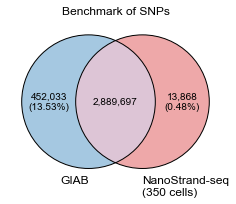

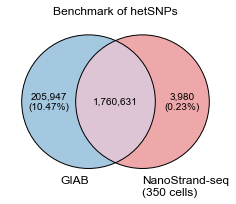

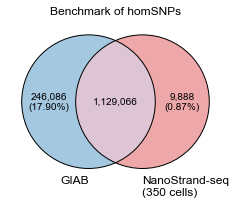

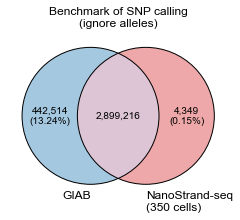

In [5]:
n1 = d["All_SNP_Reference"]
n2 = d["All_SNP_Query"]
n3 = d["All_SNP_Overlap"]
plt.figure(figsize=(3.5, 3))
plt.title("Benchmark of SNPs")
ret = venn2([1, 1, 1,], set_labels=["GIAB", "NanoStrand-seq\n(350 cells)"], set_colors=["C0", "C3"])
ret.subset_labels[0].set_text("%s\n(%.2f%%)" % (format(n1 - n3, ","), 100 - n3 * 100 / n1))
ret.subset_labels[1].set_text("%s\n(%.2f%%)" % (format(n2 - n3, ","), 100 - n3 * 100 / n2))
ret.subset_labels[2].set_text(format(n3, ","))
venn2_circles([1, 1, 1], lw=1)
plt.tight_layout()
plt.savefig("figures/benchmark_all_snps.pdf", dpi=300)

n1 = d["Het_SNP_Reference"]
n2 = d["Het_SNP_Query"]
n3 = d["Het_SNP_Overlap"]
plt.figure(figsize=(3.5, 3))
plt.title("Benchmark of hetSNPs")
ret = venn2([1, 1, 1,], set_labels=["GIAB", "NanoStrand-seq\n(350 cells)"], set_colors=["C0", "C3"])
ret.subset_labels[0].set_text("%s\n(%.2f%%)" % (format(n1 - n3, ","), 100 - n3 * 100 / n1))
ret.subset_labels[1].set_text("%s\n(%.2f%%)" % (format(n2 - n3, ","), 100 - n3 * 100 / n2))
ret.subset_labels[2].set_text(format(n3, ","))
venn2_circles([1, 1, 1], lw=1)
plt.tight_layout()
plt.savefig("figures/benchmark_het_snps.pdf", dpi=300)

n1 = d["Hom_SNP_Reference"]
n2 = d["Hom_SNP_Query"]
n3 = d["Hom_SNP_Overlap"]
plt.figure(figsize=(3.5, 3))
plt.title("Benchmark of homSNPs")
ret = venn2([1, 1, 1,], set_labels=["GIAB", "NanoStrand-seq\n(350 cells)"], set_colors=["C0", "C3"])
ret.subset_labels[0].set_text("%s\n(%.2f%%)" % (format(n1 - n3, ","), 100 - n3 * 100 / n1))
ret.subset_labels[1].set_text("%s\n(%.2f%%)" % (format(n2 - n3, ","), 100 - n3 * 100 / n2))
ret.subset_labels[2].set_text(format(n3, ","))
venn2_circles([1, 1, 1], lw=1)
plt.tight_layout()
plt.savefig("figures/benchmark_hom_snps.pdf", dpi=300)

n1 = d["Calling_Reference"]
n2 = d["Calling_Query"]
n3 = d["Calling_Overlap"]
plt.figure(figsize=(3.6, 3))
plt.title("Benchmark of SNP calling\n(ignore alleles)")
ret = venn2([1, 1, 1,], set_labels=["GIAB", "NanoStrand-seq\n(350 cells)"], set_colors=["C0", "C3"])
ret.subset_labels[0].set_text("%s\n(%.2f%%)" % (format(n1 - n3, ","), 100 - n3 * 100 / n1))
ret.subset_labels[1].set_text("%s\n(%.2f%%)" % (format(n2 - n3, ","), 100 - n3 * 100 / n2))
ret.subset_labels[2].set_text(format(n3, ","))
venn2_circles([1, 1, 1], lw=1)
plt.tight_layout()
plt.savefig("figures/benchmark_calling.pdf", dpi=300)

In [6]:
for k, v in sorted(d["Genotyping_Detail"].items()):
    r = v * 100 / d["Calling_Overlap"]
    print(k, format(v, ","), "%.2f" % r, sep="\t\t")
print("Genotyping precision", d["Genotyping_Precision"])
print("Hamming error rate:", 1 - d["Phasing_Precision"])

HET-HET		1,760,631		60.73
HET-HET.2		47		0.00
HET-HOM		9,360		0.32
HOM-HET		104		0.00
HOM-HOM		1,129,066		38.94
HOM-HOM.2		8		0.00
Genotyping precision 0.9967166985833411
Hamming error rate: 0.0002409821132023371


In [7]:
rows = []
for chrom in chroms:
    for d1 in d["Chromosomes"]:
        if d1["Chrom"] == chrom:
            recall = d1["Het_SNP_Recall"]
            precision = d1["Phasing_Precision"]
            rows.append([chrom, recall, precision])
            break
df = pd.DataFrame(rows, columns=["Chrom", "Recall", "Precision"])

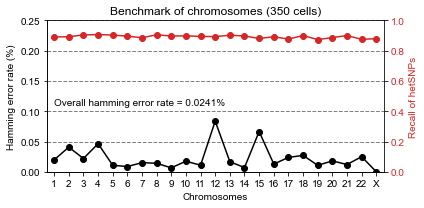

In [8]:
xs = np.arange(len(df))
ys1 = (1 - df["Precision"]) * 100
ys2 = df["Recall"]
xticks = [c[3:] for c in df["Chrom"]]

plt.figure(figsize=(6, 3))
plt.title("Benchmark of chromosomes (%d cells)" % ncell)
plt.plot(xs, ys1, marker="o", color="black")
plt.text(0, 0.11, "Overall hamming error rate = %.4f%%" % (100 - d["Phasing_Precision"] * 100))
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.ylim(0, 0.25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylabel("Hamming error rate (%)", color="black")
plt.grid(axis="y", lw=1, ls="--", color="grey")
plt.xticks(xs, xticks)
plt.xlabel("Chromosomes")

ax1 = plt.gca()
ax2 = ax1.twinx()
plt.sca(ax2)
plt.plot(xs, ys2, marker="o", color="C3")
plt.ylim(0, 1)
plt.ylabel("Recall of hetSNPs", color="C3")
plt.yticks(color="C3")
plt.sca(ax1)

plt.tight_layout()
plt.savefig("figures/phasing_precision_and_het_recall.chromosome.pdf", dpi=300)

# Benchmark of different cells

## 1. Round 1 vs round 2

In [2]:
rows = []
for ncell in ncells:
    path = "../../A1_NanoStrandseqAssembly/results/HG001_Cell_%d/round1/snvs_benchmark.json" % ncell
    d = json.load(open(path))    
    recall1 = d["Het_SNP_Recall"]
    precision1 = d["Phasing_Precision"]
    path = "../../A1_NanoStrandseqAssembly/results/HG001_Cell_%d/round2/snvs_benchmark.json" % ncell
    d = json.load(open(path))    
    recall2 = d["Het_SNP_Recall"]
    precision2 = d["Phasing_Precision"]
    rows.append([ncell, recall1, precision1, recall2, precision2])
df = pd.DataFrame(rows, columns=["Cells", "Recall1", "Precision1", "Recall2", "Precision2"])
df

,Cells,Recall1,Precision1,Recall2,Precision2
0,50,0.055997,0.998851,0.086331,0.999006
1,75,0.210201,0.999454,0.280002,0.999639
2,100,0.372984,0.999572,0.471322,0.999687
3,125,0.507321,0.999653,0.611847,0.999727
4,150,0.603471,0.999679,0.696851,0.999745
5,200,0.725127,0.999746,0.796728,0.999761
6,250,0.806032,0.999752,0.852674,0.999762
7,300,0.851285,0.999747,0.880819,0.999756
8,350,0.875829,0.999757,0.895276,0.999759


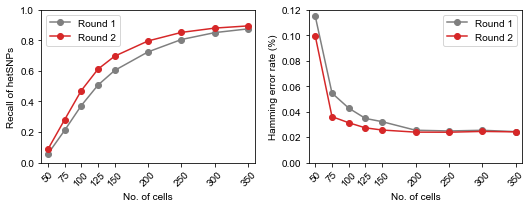

In [6]:
xs = df["Cells"]

fig, axs = plt.subplots(1, 2, figsize=(7.5, 3), sharex=True)

plt.sca(axs[0])
plt.plot(xs, df["Recall1"], color="C7", marker="o", label="Round 1", clip_on=False)
plt.plot(xs, df["Recall2"], color="C3", marker="o", label="Round 2", clip_on=False)
plt.xlim(min(ncells) - 10, max(ncells) + 10)
plt.ylim(0, 1)
plt.ylabel("Recall of hetSNPs")
plt.xticks(xs, rotation=45)
plt.xlabel("No. of cells")
# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)
plt.legend()

plt.sca(axs[1])
ys1 = (1 - df["Precision1"]) * 100
ys2 = (1 - df["Precision2"]) * 100
plt.plot(xs, ys1, color="C7", marker="o", label="Round 1", clip_on=False)
plt.plot(xs, ys2, color="C3", marker="o", label="Round 2", clip_on=False)
plt.ylim(0, 0.12)
plt.xticks(xs, rotation=45)
plt.xlabel("No. of cells")
plt.ylabel("Hamming error rate (%)")
# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)
plt.legend()

plt.tight_layout()
plt.savefig("figures/benchmark_het_snps.round1_vc_round2.pdf", dpi=300)

## 2. Integrated vs de novo

In [4]:
rows = []
for ncell in ncells:
    path = "../../4_NanoStrandSeq_Phasing/results/HG001_Cell_%d/round2/snvs_benchmark.json" % ncell
    d = json.load(open(path))    
    recall1 = d["Het_SNP_Recall"]
    precision1 = d["Phasing_Precision"]
    path = "../../4_NanoStrandSeq_Phasing/results/HG001_Cell_%d/whatshap/phased_nss.benchmark_phasing.json" % ncell
    d = json.load(open(path))
    recall2 = d["Phasing_Recall"]
    precision2 = d["Phasing_Precision"]
    rows.append([ncell, recall1, precision1, recall2, precision2])
df = pd.DataFrame(rows, columns=["Cells", "Recall1", "Precision1", "Recall2", "Precision2"])
df["ErrorRate1"] = 1 - df["Precision1"]
df["ErrorRate2"] = 1 - df["Precision2"]
df.to_csv("results/benchmark_of_hetsnp.round2_vs_knownsnps.tsv", sep="\t", index=False)
df

,Cells,Recall1,Precision1,Recall2,Precision2,ErrorRate1,ErrorRate2
0,50,0.086331,0.999006,0.573918,0.980550,0.000994,0.019450
1,75,0.280002,0.999639,0.883300,0.993479,0.000361,0.006521
2,100,0.471322,0.999687,0.953549,0.997114,0.000313,0.002886
3,125,0.611847,0.999727,0.973849,0.998542,0.000273,0.001458
4,150,0.696851,0.999745,0.981590,0.998788,0.000255,0.001212
5,200,0.796728,0.999761,0.988196,0.999212,0.000239,0.000788
6,250,0.852674,0.999762,0.991391,0.999322,0.000238,0.000678
7,300,0.880819,0.999756,0.992595,0.999336,0.000244,0.000664
8,350,0.895276,0.999759,0.993252,0.999371,0.000241,0.000629


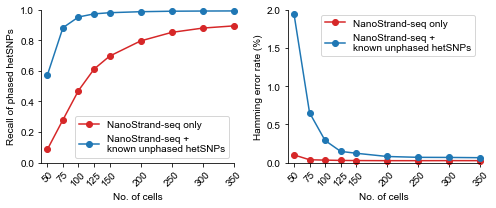

In [6]:
xs = df["Cells"]

fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharex=True)

plt.sca(axs[0])
ys1 = df["Recall1"]
ys2 = df["Recall2"]
plt.plot(xs, ys1, marker="o", color="C3", clip_on=False, label="NanoStrand-seq only")
plt.plot(xs, ys2, marker="o", color="C0", clip_on=False, label="NanoStrand-seq +\nknown unphased hetSNPs")
plt.xlabel("No. of cells")
plt.ylabel("Recall of phased hetSNPs")
plt.xlim(min(xs) - 10, max(xs))
plt.ylim(0, 1)
plt.xticks(xs, rotation=45)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()

plt.sca(axs[1])
ys1 = (1 - df["Precision1"]) * 100
ys2 = (1 - df["Precision2"]) * 100
# plt.plot(xs, ys1, marker="o", color="C3", clip_on=False, label="$\it{De}$ $\it{novo}$ phasing")
plt.plot(xs, ys1, marker="o", color="C3", clip_on=False, label="NanoStrand-seq only")
plt.plot(xs, ys2, marker="o", color="C0", clip_on=False, label="NanoStrand-seq +\nknown unphased hetSNPs")
plt.xlabel("No. of cells")
plt.ylabel("Hamming error rate (%)")
plt.xlim(min(xs) - 10, max(xs))
plt.ylim(0, 2)
plt.yticks([0, 0.5, 1, 1.5, 2])
plt.xticks(xs, rotation=45)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()

plt.tight_layout()
plt.savefig("figures/benchmark_het_snps.comb.pdf", dpi=300)

## 3. Recall of chromosomes

In [7]:
rows = []
for ncell in ncells:
    for r in [1, 2]:
        path = "../../A1_NanoStrandseqAssembly/results/HG001_Cell_%d/round%s/snvs_benchmark.json" % (ncell, r)
        d = json.load(open(path))
        recalls = []
        for chrom in chroms:
            recall = None
            for item in d["Chromosomes"]:
                if item["Chrom"] == chrom:
                    recall = item["Het_SNP_Recall"]
                    rows.append([ncell, r, chrom, recall])
                    break
df = pd.DataFrame(rows, columns=["Cells", "Round", "Chrom", "Recall"])
df

,Cells,Round,Chrom,Recall
0,50,1,chr1,0.034381
1,50,1,chr2,0.063189
2,50,1,chr3,0.059575
3,50,1,chr4,0.051696
4,50,1,chr5,0.065954
...,...,...,...,...
409,350,2,chr19,0.873178
410,350,2,chr20,0.886633
411,350,2,chr21,0.899716
412,350,2,chr22,0.874936


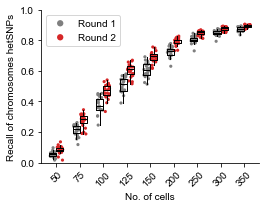

In [13]:
w = 0.3
colors = ["C7", "C3"]

np.random.seed(0)

plt.figure(figsize=(3.8, 3))
for i, r in enumerate([1, 2]):
    
    array = [df[(df["Cells"] == ncell) & (df["Round"] == r)]["Recall"] for ncell in ncells]
    xs = [x + (i - 0.5) * w for x in range(len(ncells))]
    plt.boxplot(array, positions=xs, widths=w, 
                showcaps=False, showfliers=False, 
                medianprops={"color": "black"}, zorder=10)
    xs1 = []
    ys1 = []
    for j, ncell in enumerate(ncells):
        recalls = df[(df["Cells"] == ncell) & (df["Round"] == r)]["Recall"]
        for y in recalls:
            x = j + (i - 0.5) * w + (np.random.random() - 0.5) * w * 0.8
            xs1.append(x)
            ys1.append(y)
    plt.scatter(xs1, ys1, color=colors[i], edgecolor="none", s=10, marker="o", label="Round %s" % r)
xs = np.arange(len(ncells))
plt.xticks(xs, ncells, rotation=45)
plt.xlabel("No. of cells")
plt.ylabel("Recall of chromosomes hetSNPs")
plt.ylim(0, 1)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(markerscale=2)
plt.tight_layout()
plt.savefig("figures/recall_of_chromosome.pdf", dpi=300)